In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
df = pd.read_csv('../data/snp.csv')
population = pd.read_csv('../data/population.csv', usecols=['population'])

In [3]:
df = df.join(population)

In [4]:
df.head()

,name,rs9442373_C,rs1571150_A,rs4074196_C,rs2748986_G,rs28508199_G,rs6661597_T,rs2257182_C,rs12045693_A,rs2843142_A,...,rs4824127_C,rs131817_A,rs131750_C,rs2238837_C,rs28680530_C,rs34787751_G,rs34027812_A,rs311157_T,rs2984684_T,population
0,NA19919,0,2,0,1,1,1,0,0,1,...,1,0,0,2,1,0,1,0,1,ASW
1,NA19916,0,0,0,2,2,0,2,2,0,...,1,0,0,2,1,1,1,1,2,ASW
2,NA19835,1,2,1,1,2,0,2,2,1,...,1,1,0,2,1,0,1,1,2,ASW
3,NA20282,1,0,1,0,1,0,1,0,1,...,1,0,1,0,2,1,2,0,2,ASW
4,NA19703,0,2,2,1,2,0,2,1,0,...,1,1,0,1,0,1,2,1,2,ASW


In [5]:
col = df.columns[1]
a = df.groupby(['population'])[col].value_counts()
a = a.rename('count').reset_index()
a = a.rename(columns={col: 'allele', 'count': col})
a

,population,allele,rs9442373_C
0,ASW,1,44
1,ASW,0,24
2,ASW,2,19
3,CEU,1,81
4,CEU,0,55
5,CEU,2,29
6,CHB,1,62
7,CHB,0,41
8,CHB,2,34


In [6]:
for col in df.columns[2:11]:
    b = df.groupby(['population'])[col].value_counts()
    b = b.rename('count').reset_index()
    b = b.rename(columns={col: 'allele', 'count': col})
    a = a.merge(b, on=['population', 'allele'])

In [7]:
a

,population,allele,rs9442373_C,rs1571150_A,rs4074196_C,rs2748986_G,rs28508199_G,rs6661597_T,rs2257182_C,rs12045693_A,rs2843142_A,rs2840528_A
0,ASW,1,44,44,44,45,37,23,41,48,28,35
1,ASW,0,24,18,23,16,11,63,10,22,49,39
2,ASW,2,19,25,20,26,39,1,36,17,10,13
3,CEU,1,81,74,84,80,73,76,76,77,81,92
4,CEU,0,55,74,49,44,75,32,69,62,53,35
5,CEU,2,29,17,32,41,17,57,20,26,31,38
6,CHB,1,62,66,70,69,73,67,62,75,78,63
7,CHB,0,41,26,28,49,50,53,50,23,29,28
8,CHB,2,34,45,39,19,14,17,25,39,30,46


In [8]:
final = pd.melt(a, id_vars=['population', 'allele'], var_name='snp')
final.head()

,population,allele,snp,value
0,ASW,1,rs9442373_C,44
1,ASW,0,rs9442373_C,24
2,ASW,2,rs9442373_C,19
3,CEU,1,rs9442373_C,81
4,CEU,0,rs9442373_C,55


In [9]:
translate_allele = {0: 'AA', 1: 'AB', 2: 'BB'}
final.allele = final.allele.apply(lambda t: translate_allele[t])

In [10]:
final.head()

,population,allele,snp,value
0,ASW,AB,rs9442373_C,44
1,ASW,AA,rs9442373_C,24
2,ASW,BB,rs9442373_C,19
3,CEU,AB,rs9442373_C,81
4,CEU,AA,rs9442373_C,55


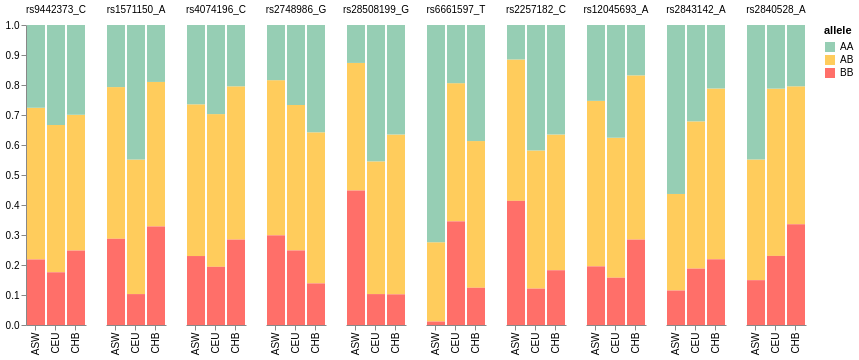

In [11]:
alt.Chart(final).mark_bar().encode(
    x=alt.X('population:N', title=None),
    y=alt.Y('value:Q', axis=alt.Axis(grid=False, title=None), stack='normalize'),
    column=alt.Column('snp:N', title=None, sort=list(df.columns[1:11])),
    color=alt.Color('allele:N', scale=alt.Scale(range=['#96ceb4', '#ffcc5c','#ff6f69']))
).configure_view(
    strokeOpacity=0
)

***

df.iloc[:10, :10].to_latex()